# Jensen-Shannon Divergence & Cross-Entropy Loss

In [ ]:
import timm
import torch
import torch.nn.functional as F
from timm.loss import LabelSmoothingCrossEntropy, SoftTargetCrossEntropy
from timm.loss import JsdCrossEntropy
from timm.data.mixup import mixup_target
import matplotlib.pyplot as plt

Let's create a example of the `output` of a model, and our `labels`. Note we have 3 output predictions, but only 1 label. 

In [ ]:
output = F.one_hot(torch.tensor([0,9,0])).float()
labels=torch.tensor([0])

If we set label `smoothing` and `alpha` to 0, then we will have the regular `cross_entropy loss`, if we look only at the first element of our output and labels. 

In [ ]:
jsd = JsdCrossEntropy(smoothing=0,alpha=0)

In [ ]:
jsd(output,labels)

tensor(1.4612)

In [ ]:
base_loss = F.cross_entropy(output[0,None],labels[0,None])
base_loss

tensor(1.4612)

In [ ]:
jsd = JsdCrossEntropy(num_splits=1,smoothing=0,alpha=0)

We can also change the number of splits,changing the size of each group. In `Augmix` this would equate to the number of transformation mixtures. 

In [ ]:
jsd = JsdCrossEntropy(num_splits=2,smoothing=0,alpha=0)
output = F.one_hot(torch.tensor([0,9,1,0])).float()
labels=torch.tensor([0,9])

In [ ]:
jsd(output,labels),F.cross_entropy(output[[0,1]],labels)

(tensor(1.4612), tensor(1.4612))

By default we have 1 label for 3 predictions, this is a two part loss, and measures both cross entropy and jason-shannon divergence. Jason-shannon entropy does not need a label, instead measuring the how significantly different the 3 predictions are.

In [ ]:
jsd = JsdCrossEntropy(smoothing=0)
output = F.one_hot(torch.tensor([0,0,0]),num_classes=10).float()

In [ ]:
deltas = torch.cat((torch.zeros([2,10]),torch.tensor([[-1,1,0,0,0,0,0,0,0,0]])))*0.1
deltas[2]

tensor([-0.1000,  0.1000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000])

In [ ]:
deltas=(torch.arange(-10,11))[...,None,None]*deltas

In [ ]:
losses = [jsd((output+delta),labels)-base_loss for delta in deltas]

The below graph shows how changes in one of the model's outputs(prediction), in a group, effects the Jason-Shannon Divergence. 

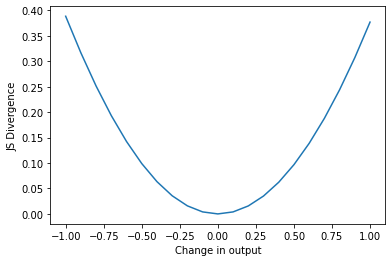

In [ ]:
plt.plot([ .1*i-1 for i in range(len(losses))],[loss for loss in losses])
plt.ylabel('JS Divergence')
plt.xlabel('Change in output')
plt.show()

In [ ]:
#hide
from nbdev.export import notebook2script
notebook2script()

Converted 00_model_architectures.ipynb.
Converted 01_training_scripts.ipynb.
Converted 02_dataset.ipynb.
Converted 03_loss.cross_entropy.ipynb.
Converted 04_models.ipynb.
Converted 05_loss.jsd_cross_entropy.ipynb.
Converted index.ipynb.
